In [1]:
import numpy as no
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.drop(["sepal length (cm)","sepal width (cm)"],axis=1,inplace=True)

In [7]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [8]:
from sklearn.cluster import KMeans

In [9]:
inert = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df[["petal length (cm)", "petal width (cm)"]])
    inert.append(km.inertia_)

In [10]:
inert

[550.8953333333334,
 86.39021984551395,
 31.371358974358984,
 19.483000899685116,
 13.91690875790876,
 11.040239971910452,
 9.275455486542445,
 7.7997619047619065,
 6.456494541406307,
 5.666710345210344]

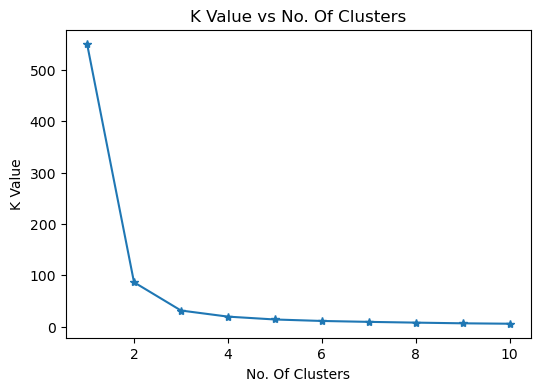

In [11]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11),inert,marker="*")
plt.xlabel("No. Of Clusters")
plt.ylabel("K Value")
plt.title("K Value vs No. Of Clusters")
plt.show()

In [12]:
model = KMeans(n_clusters=3)

In [13]:
model.fit(df[["petal length (cm)","petal width (cm)"]])

KMeans(n_clusters=3)

In [14]:
y_pred = model.predict(df[["petal length (cm)","petal width (cm)"]])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
df["cluster"] = y_pred

In [16]:
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [17]:
a = df[df["cluster"]==0]
b = df[df["cluster"]==1]
c = df[df["cluster"]==2]

In [18]:
a.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [19]:
b.head()

,petal length (cm),petal width (cm),cluster
77,5.0,1.7,1
83,5.1,1.6,1
100,6.0,2.5,1
101,5.1,1.9,1
102,5.9,2.1,1


In [20]:
c.head()

,petal length (cm),petal width (cm),cluster
50,4.7,1.4,2
51,4.5,1.5,2
52,4.9,1.5,2
53,4.0,1.3,2
54,4.6,1.5,2


In [21]:
cetroid_points = model.cluster_centers_

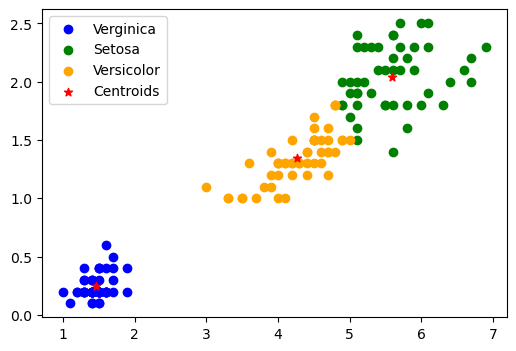

In [22]:
plt.figure(figsize=(6,4))
plt.scatter(a["petal length (cm)"],a["petal width (cm)"],color="blue",label="Verginica")
plt.scatter(b["petal length (cm)"],b["petal width (cm)"],color="green",label="Setosa")
plt.scatter(c["petal length (cm)"],c["petal width (cm)"],color="orange",label="Versicolor")
plt.scatter(cetroid_points[:,0],cetroid_points[:,1],color="red",label="Centroids",marker="*")
plt.legend()
plt.show()